In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
df = pd.read_csv('../../data/raw/landuse.csv')

C:\Users\MSI-NB\AppData\Local\Temp\ipykernel_32460\1368319587.py:8: DtypeWarning: Columns (21,22,24,25,26,28,65,66,81,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/raw/landuse.csv')


In [3]:
df.columns

Index(['borough', 'block', 'lot', 'cd', 'bct2020', 'bctcb2020', 'ct2010',
       'cb2010', 'schooldist', 'council', 'zipcode', 'firecomp', 'policeprct',
       'healthcenterdistrict', 'healtharea', 'sanitboro', 'sanitdistrict',
       'sanitsub', 'address', 'zonedist1', 'zonedist2', 'zonedist3',
       'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2', 'spdist3',
       'ltdheight', 'splitzone', 'bldgclass', 'landuse', 'easements',
       'ownertype', 'ownername', 'lotarea', 'bldgarea', 'comarea', 'resarea',
       'officearea', 'retailarea', 'garagearea', 'strgearea', 'factryarea',
       'otherarea', 'areasource', 'numbldgs', 'numfloors', 'unitsres',
       'unitstotal', 'lotfront', 'lotdepth', 'bldgfront', 'bldgdepth', 'ext',
       'proxcode', 'irrlotcode', 'lottype', 'bsmtcode', 'assessland',
       'assesstot', 'exempttot', 'yearbuilt', 'yearalter1', 'yearalter2',
       'histdist', 'landmark', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'borocode', 'bbl', 'cond

In [4]:
df_cleaned = df.dropna(subset=['landuse'])

In [5]:
df_cleaned

,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,...,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,QN,15908,16,414.0,4096400.0,4.096400e+10,964.00,2007.0,27.0,31.0,...,NaN,NaN,1,1.0,1.0,24v1,NaN,40.592804,-73.792627,NaN
1,BX,5081,20,212.0,2041400.0,2.041400e+10,414.00,1002.0,11.0,11.0,...,NaN,NaN,1,NaN,NaN,24v1,NaN,40.900924,-73.853334,NaN
2,QN,2698,77,405.0,4052500.0,4.052500e+10,525.00,2000.0,24.0,30.0,...,NaN,NaN,1,NaN,NaN,24v1,NaN,40.719938,-73.907615,NaN
3,QN,2636,19,405.0,4059502.0,4.059502e+10,595.00,4001.0,24.0,30.0,...,NaN,NaN,1,NaN,NaN,24v1,NaN,40.715297,-73.911679,NaN
4,QN,2638,33,405.0,4059502.0,4.059502e+10,595.00,4002.0,24.0,30.0,...,NaN,NaN,1,NaN,NaN,24v1,NaN,40.714149,-73.910159,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858567,SI,7037,1,503.0,5020805.0,5.020805e+10,208.01,2010.0,31.0,51.0,...,NaN,NaN,1,NaN,NaN,24v1,NaN,40.548043,-74.212628,NaN
858568,QN,6862,1004,408.0,NaN,NaN,NaN,NaN,28.0,24.0,...,NaN,NaN,2,NaN,NaN,24v1,NaN,40.715305,-73.807331,NaN
858569,BK,2379,19,301.0,3055500.0,3.055500e+10,555.00,1022.0,14.0,34.0,...,3.023790e+09,09/21/2021,2,NaN,NaN,24v1,NaN,40.715666,-73.962924,NaN
858570,QN,2649,60,405.0,4059502.0,4.059502e+10,595.00,1003.0,24.0,30.0,...,NaN,NaN,1,NaN,NaN,24v1,NaN,40.716346,-73.911361,NaN


In [6]:
df_BK_cleaned = df_cleaned[df_cleaned['borough'] == 'BK']
df_BK_cleaned

,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,...,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
7,BK,4052,31,305.0,3116400.0,3.116400e+10,1164.0,2001.0,19.0,42.0,...,NaN,NaN,1,NaN,NaN,24v1,NaN,40.670903,-73.880293,NaN
38,BK,5838,45,310.0,3003000.0,3.003000e+10,30.0,1004.0,20.0,47.0,...,NaN,NaN,1,NaN,NaN,24v1,NaN,40.639739,-74.029373,NaN
39,BK,773,62,307.0,3007800.0,3.007800e+10,78.0,1000.0,15.0,38.0,...,NaN,NaN,1,NaN,NaN,24v1,NaN,40.647996,-74.013146,NaN
40,BK,790,24,307.0,3007800.0,3.007800e+10,78.0,4001.0,15.0,38.0,...,NaN,NaN,1,NaN,NaN,24v1,NaN,40.646928,-74.013802,NaN
41,BK,728,31,307.0,3008200.0,3.008200e+10,82.0,2002.0,15.0,38.0,...,NaN,NaN,1,NaN,NaN,24v1,NaN,40.650639,-74.009377,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858560,BK,4252,21,305.0,3120000.0,3.120000e+10,1200.0,2007.0,19.0,42.0,...,NaN,NaN,1,NaN,NaN,24v1,NaN,40.674336,-73.869616,NaN
858561,BK,4892,34,317.0,3085800.0,3.085800e+10,858.0,2002.0,18.0,40.0,...,NaN,NaN,1,NaN,NaN,24v1,NaN,40.649626,-73.941072,NaN
858563,BK,3551,38,316.0,3089400.0,3.089400e+10,894.0,1002.0,23.0,41.0,...,NaN,NaN,1,NaN,NaN,24v1,NaN,40.663593,-73.918236,NaN
858569,BK,2379,19,301.0,3055500.0,3.055500e+10,555.0,1022.0,14.0,34.0,...,3.023790e+09,09/21/2021,2,NaN,NaN,24v1,NaN,40.715666,-73.962924,NaN


In [7]:
aggregated_data = df_BK_cleaned.groupby('landuse').agg('count')

aggregated_data

,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,...,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
landuse,,,,,,,,,,,,,,,,,,,,,
1.0,155887,155887,155887,155873,155873,155873,155873,155873,155873,155873,...,9064,9064,155887,3499,16916,155887,6309,155873,155873,0
2.0,65324,65324,65324,65257,65257,65257,65257,65257,65257,65257,...,6926,6926,65324,816,3164,65324,5123,65257,65257,0
3.0,3748,3748,3748,3705,3702,3702,3702,3702,3705,3705,...,964,964,3748,160,299,3748,152,3705,3705,0
4.0,24732,24732,24732,24694,24694,24694,24694,24694,24694,24694,...,2056,2056,24732,545,1015,24732,979,24694,24694,0
5.0,5639,5639,5639,5603,5603,5603,5603,5603,5603,5603,...,861,861,5639,319,616,5639,111,5603,5603,0
6.0,4018,4018,4018,4011,4011,4011,4011,4011,4010,4011,...,667,667,4018,398,524,4018,43,4011,4011,0
7.0,1851,1851,1851,1798,1797,1797,1797,1797,1778,1798,...,115,115,1851,197,273,1851,578,1794,1794,0
8.0,4233,4233,4233,4225,4225,4225,4225,4225,4225,4225,...,508,508,4233,144,267,4233,705,4225,4225,0
9.0,1226,1226,1226,1226,1226,1226,1226,1226,1212,1226,...,77,77,1226,174,206,1226,984,1226,1226,0


D:\anaconda\envs\cusp\Lib\site-packages\geopandas\_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\MSI-NB\AppData\Local\Temp\ipykernel_32460\2356380708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BK_cleaned['geometry'] = df_BK_cleaned.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)


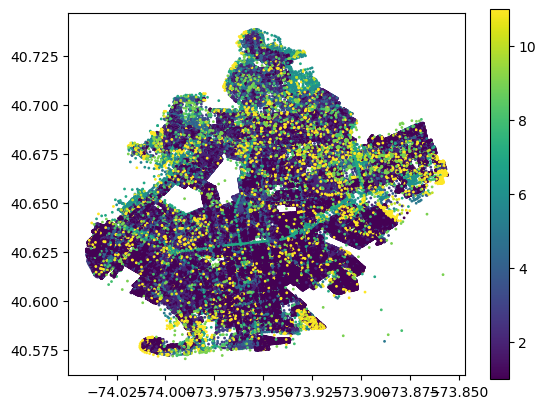

In [8]:
import geopandas as gpd
from shapely.geometry import Point
# 将经纬度转换为Point几何类型
df_BK_cleaned['geometry'] = df_BK_cleaned.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# 将DataFrame转换为GeoDataFrame
gdf_BK_cleaned = gpd.GeoDataFrame(df_BK_cleaned, geometry='geometry')

fig, ax = plt.subplots()

# 使用scatter绘制，这里我们可以直接控制点的大小
gdf_BK_cleaned.plot(ax=ax, column='landuse', cmap='viridis', legend=True, markersize=1)

plt.show()

In [9]:
import pandas as pd

# Assuming df_BK_cleaned is your DataFrame and it's already imported

# Map the 'landuse' values to new categories
def categorize_landuse(value):
    if value in [1, 2, 3]:
        return 1
    elif value in [4, 5]:
        return 2
    elif value in [6, 7, 8]:
        return 3
    elif value in [9, 10, 11]:
        return 4
    else:
        return None

# Apply the mapping function to create a new column
df_BK_cleaned['landuse_category'] = df_BK_cleaned['landuse'].apply(categorize_landuse)

df_BK_cleaned

C:\Users\MSI-NB\AppData\Local\Temp\ipykernel_32460\3874028184.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BK_cleaned['landuse_category'] = df_BK_cleaned['landuse'].apply(categorize_landuse)


,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,...,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes,geometry,landuse_category
7,BK,4052,31,305.0,3116400.0,3.116400e+10,1164.0,2001.0,19.0,42.0,...,1,NaN,NaN,24v1,NaN,40.670903,-73.880293,NaN,POINT (-73.88029280000001 40.6709026),1
38,BK,5838,45,310.0,3003000.0,3.003000e+10,30.0,1004.0,20.0,47.0,...,1,NaN,NaN,24v1,NaN,40.639739,-74.029373,NaN,POINT (-74.02937319999999 40.6397392),1
39,BK,773,62,307.0,3007800.0,3.007800e+10,78.0,1000.0,15.0,38.0,...,1,NaN,NaN,24v1,NaN,40.647996,-74.013146,NaN,POINT (-74.0131461 40.6479958),1
40,BK,790,24,307.0,3007800.0,3.007800e+10,78.0,4001.0,15.0,38.0,...,1,NaN,NaN,24v1,NaN,40.646928,-74.013802,NaN,POINT (-74.0138017 40.646928),1
41,BK,728,31,307.0,3008200.0,3.008200e+10,82.0,2002.0,15.0,38.0,...,1,NaN,NaN,24v1,NaN,40.650639,-74.009377,NaN,POINT (-74.009377 40.6506394),4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858560,BK,4252,21,305.0,3120000.0,3.120000e+10,1200.0,2007.0,19.0,42.0,...,1,NaN,NaN,24v1,NaN,40.674336,-73.869616,NaN,POINT (-73.8696156 40.6743357),4
858561,BK,4892,34,317.0,3085800.0,3.085800e+10,858.0,2002.0,18.0,40.0,...,1,NaN,NaN,24v1,NaN,40.649626,-73.941072,NaN,POINT (-73.9410718 40.6496256),4
858563,BK,3551,38,316.0,3089400.0,3.089400e+10,894.0,1002.0,23.0,41.0,...,1,NaN,NaN,24v1,NaN,40.663593,-73.918236,NaN,POINT (-73.9182359 40.6635935),1
858569,BK,2379,19,301.0,3055500.0,3.055500e+10,555.0,1022.0,14.0,34.0,...,2,NaN,NaN,24v1,NaN,40.715666,-73.962924,NaN,POINT (-73.9629242 40.7156657),2


In [19]:
import pandas as pd

# Assuming df_BK_cleaned and the 'landuse_category' column have already been set up from the previous step

# Group by 'zipcode' and 'landuse_category' and count occurrences
landuse_counts = df_BK_cleaned.groupby(['zipcode', 'landuse_category']).size().reset_index(name='count')

# Calculate the total counts for each zipcode
total_counts = df_BK_cleaned.groupby('zipcode').size().reset_index(name='total_count')

# Merge the counts data with total counts for each zipcode
landuse_density = pd.merge(landuse_counts, total_counts, on='zipcode')

# Calculate the density for each landuse category within each zipcode
landuse_density['density'] = landuse_density['count'] / landuse_density['total_count']

# Display the results
landuse_density[['zipcode', 'landuse_category', 'density']]


,zipcode,landuse_category,density
0,11201.0,1,0.639903
1,11201.0,2,0.265318
2,11201.0,3,0.051011
3,11201.0,4,0.043767
4,11203.0,1,0.883246
...,...,...,...
151,11249.0,3,0.084656
152,11249.0,4,0.076058
153,11251.0,3,1.000000
154,11414.0,4,1.000000


<Figure size 1200x800 with 0 Axes>

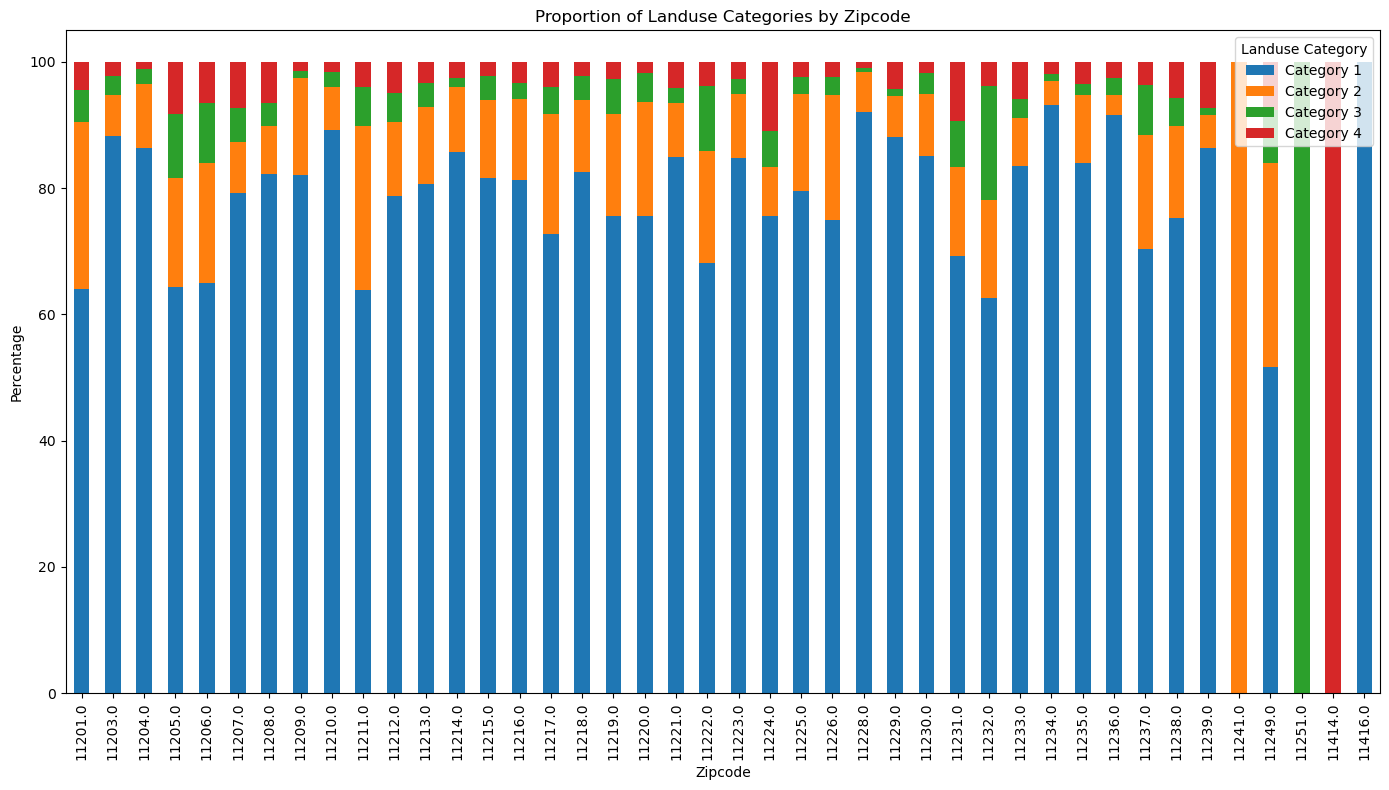

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_BK_cleaned and the 'landuse_category' column have already been set up from the previous steps

# Group by 'zipcode' and 'landuse_category' and count occurrences
landuse_counts = df_BK_cleaned.groupby(['zipcode', 'landuse_category']).size().reset_index(name='count')

# Calculate the total counts for each zipcode
total_counts = df_BK_cleaned.groupby('zipcode').size().reset_index(name='total_count')

# Merge the counts data with total counts for each zipcode
landuse_density = pd.merge(landuse_counts, total_counts, on='zipcode')

# Calculate the percentage for each landuse category within each zipcode
landuse_density['percentage'] = (landuse_density['count'] / landuse_density['total_count']) * 100

# Pivot the data to make 'landuse_category' columns, zipcode as index
landuse_pivot = landuse_density.pivot(index='zipcode', columns='landuse_category', values='percentage')

# Fill NaN values with 0 for zipcodes that don't have entries in some categories
landuse_pivot = landuse_pivot.fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
landuse_pivot.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], figsize=(14, 8))
plt.title('Proportion of Landuse Categories by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Percentage')
plt.legend(title='Landuse Category', labels=['Category 1', 'Category 2', 'Category 3', 'Category 4'], loc='upper right')
plt.tight_layout()
plt.show()
